In [60]:
# Math 
from math import sqrt
from scipy import stats
import statistics
import os

# General
import numpy as np
import pandas as pd

# Sklearn Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Graph
from tabulate import tabulate

# Custom Module's
from wrangle import get_zillow_data


import warnings
warnings.filterwarnings("ignore")

# Acquire

In [61]:
df = get_zillow_data()

# Peak into the data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
 7   propertylandusetypeid         float64
dtypes: float64(8)
memory usage: 147.8 MB


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00
propertylandusetypeid,2152863.0,261.000000,0.000000,261.00,261.00,261.00,261.00,261.00


In [64]:
df.shape

(2152863, 8)

In [65]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


# Clean

#### Drop Null Values

I'm not really sure if I should impute missing values or drop them.  For the moment I will drop them and look into what would be a good method to use if I did want to impute.

In [66]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
propertylandusetypeid              0
dtype: int64

In [67]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()

In [68]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
propertylandusetypeid           0
dtype: int64

# Change Data Type

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
 7   propertylandusetypeid         float64
dtypes: float64(8)
memory usage: 147.0 MB


#### Only TaxValue, Tax Amount, and bathroomcnt, need to stay floats.  The rest convert into int

In [70]:
to_int = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'fips', 'propertylandusetypeid']
int_df = df[to_int].astype('int')
df = df.drop(columns=to_int)
df = pd.concat([df, int_df], axis = 1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bathroomcnt                   float64
 1   taxvaluedollarcnt             float64
 2   taxamount                     float64
 3   bedroomcnt                    int64  
 4   calculatedfinishedsquarefeet  int64  
 5   yearbuilt                     int64  
 6   fips                          int64  
 7   propertylandusetypeid         int64  
dtypes: float64(3), int64(5)
memory usage: 147.0 MB


In [72]:
def clean_zillow_data(df):
    df = df.replace(r'^\s*$', np.nan, regex=True)
    df = df.dropna()
    to_int = ['bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'fips', 'propertylandusetypeid']
    int_df = df[to_int].astype('int')
    df = df.drop(columns=to_int)
    df = pd.concat([df, int_df], axis = 1)
    return df

# Visualize

In [76]:
cols = list(df.columns)
cols

['bathroomcnt',
 'taxvaluedollarcnt',
 'taxamount',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'yearbuilt',
 'fips',
 'propertylandusetypeid']

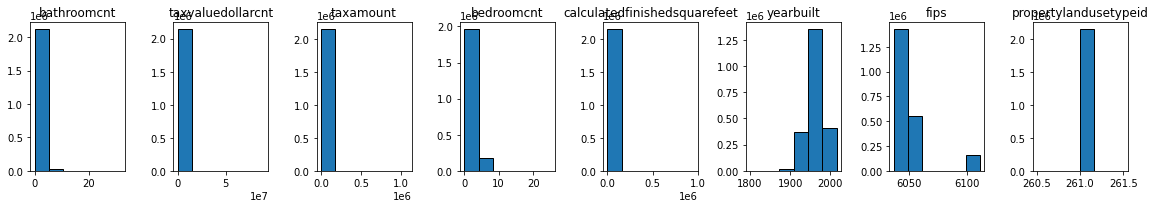

In [102]:
plt.figure(figsize=(16, 3))

# List of columns

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,8, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=6, edgecolor='black')
    
    #spacing
    plt.tight_layout()
    
    # Hide gridlines.
    plt.grid(False)